In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from google.colab import drive

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

%matplotlib inline

In [ ]:
drive.mount('/content/gdrive')

# Replace 'your_file.csv' with the actual filename
file_path = '/content/gdrive/MyDrive/ENSC/3A/Deep Learning/features_4.csv'

def load_and_preprocess_data(file_path):
    """
    Load the dataset from the given file path and perform preprocessing steps.
    """
    df = pd.read_csv(file_path)
    df.sort_values(by=['time','latitude','longitude'])
    df = df.drop(["g"], axis=1)
    df = df.interpolate()
    df = df.dropna()

    for col in df.select_dtypes(include='float64').columns:
      df[col] = df[col].astype('float32', copy=False)

    return df

df = load_and_preprocess_data(file_path)
df.info()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Int64Index: 718854 entries, 1 to 718854
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       718854 non-null  object 
 1   latitude   718854 non-null  float32
 2   longitude  718854 non-null  float32
 3   10u        718854 non-null  float32
 4   10v        718854 non-null  float32
 5   100u       718854 non-null  float32
 6   100v       718854 non-null  float32
 7   msl        718854 non-null  float32
 8   sst        718854 non-null  float32
 9   swvl1      718854 non-null  float32
 10  geo500     718854 non-null  float32
 11  2t         718854 non-null  float32
dtypes: float32(11), object(1)
memory usage: 41.1+ MB


In [ ]:
df

,time,latitude,longitude,10u,10v,100u,100v,msl,sst,swvl1,geo500,2t
1,2007-02-13 00:00:00,36.50,129.50,0.704773,2.175766,0.462662,3.286316,102273.875,286.206543,0.141881,54560.300781,5.549957
2,2007-02-13 00:00:00,36.50,129.75,0.313171,4.172836,0.204849,4.590027,102267.125,286.229980,0.000004,54570.300781,9.995270
3,2007-02-13 00:00:00,36.50,130.00,-0.357727,4.627914,-0.373276,4.840027,102269.875,286.289551,0.000004,54569.550781,10.278473
4,2007-02-13 00:00:00,36.25,125.00,-4.923157,6.697250,-5.636948,8.063660,101941.625,281.294434,0.000004,54686.550781,7.874176
5,2007-02-13 00:00:00,36.25,125.25,-4.820618,6.605453,-5.430893,7.805847,101973.625,281.154785,0.000004,54687.300781,7.633942
...,...,...,...,...,...,...,...,...,...,...,...,...
718850,2023-11-19 12:00:00,34.00,129.00,10.564636,-3.080109,11.930634,-3.466751,101845.875,294.018066,0.000005,55508.691406,16.389801
718851,2023-11-19 12:00:00,34.00,129.25,10.969910,-2.972687,12.307587,-3.304642,101832.625,294.203613,0.000005,55488.191406,16.299957
718852,2023-11-19 12:00:00,34.00,129.50,10.767761,-2.702179,12.258759,-3.010696,101818.625,294.274902,0.000005,55467.941406,16.333160
718853,2023-11-19 12:00:00,34.00,129.75,11.442566,-2.366241,12.838837,-2.653275,101801.625,294.237793,0.000005,55448.691406,16.514801


In [ ]:
# Data of Seoul
df_seoul = df[(df['latitude'] == 37.5) & (df['longitude'] == 127.0)].drop(['latitude', 'longitude'], axis=1)
del df_seoul['time']
df_seoul.reset_index()

,index,10u,10v,100u,100v,msl,sst,swvl1,geo500,2t
0,264,-3.021011,-0.742157,-6.395187,-0.672440,101322.0000,279.651245,0.487910,54276.433594,1.713043
1,621,-0.478897,0.085022,-0.562378,-0.053604,101955.1875,279.650299,0.420809,53746.195312,-1.047455
2,978,1.569031,-0.535706,2.412399,-1.377411,101910.6875,279.650299,0.415872,53697.792969,3.201324
3,1335,-2.223083,0.458145,-4.100388,1.877075,102449.6250,279.848297,0.385515,53967.828125,4.491364
4,1692,-1.239517,-1.504105,-1.653015,-1.716141,102449.5000,279.848297,0.383202,54513.824219,5.713776
...,...,...,...,...,...,...,...,...,...,...
2008,717120,1.146744,-1.066589,1.767456,-1.286469,102470.8750,289.825806,0.476346,55690.953125,4.180817
2009,717477,1.970001,-1.644547,2.648987,-2.322464,103023.5000,287.736053,0.450589,54497.953125,-0.729584
2010,717834,1.820160,-1.414200,4.136017,-3.286407,102860.8125,287.736053,0.446649,55094.070312,0.906647
2011,718191,-1.544540,2.118195,0.024780,4.875458,101842.5000,285.981750,0.467940,54836.042969,2.664948


In [ ]:
df_seoul_temperature = df_seoul[["2t"]]

# Set the frequency to daily
#df_seoul_temperature = df_seoul_temperature.asfreq('MS')

df_seoul_temperature.reset_index()

,index,2t
0,264,1.713043
1,621,-1.047455
2,978,3.201324
3,1335,4.491364
4,1692,5.713776
...,...,...
2008,717120,4.180817
2009,717477,-0.729584
2010,717834,0.906647
2011,718191,2.664948


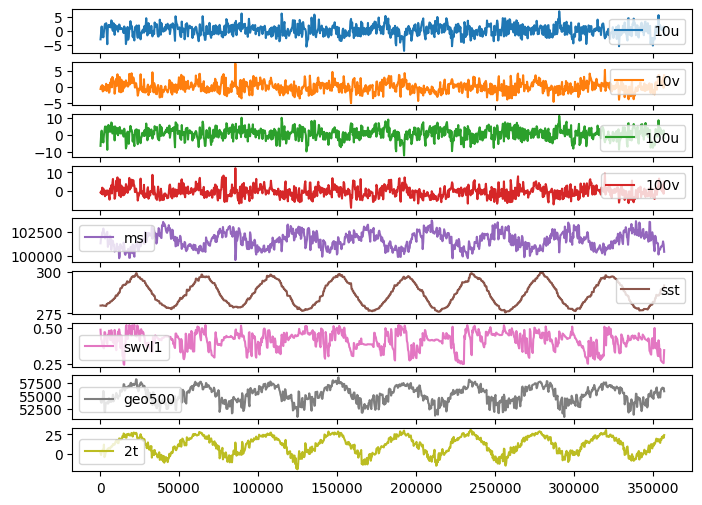

In [ ]:
plot_cols = df_seoul.columns

plot_features = df_seoul[plot_cols][:1000]
plot_features.index = df_seoul.index[:1000]
_ = plot_features.plot(subplots=True)

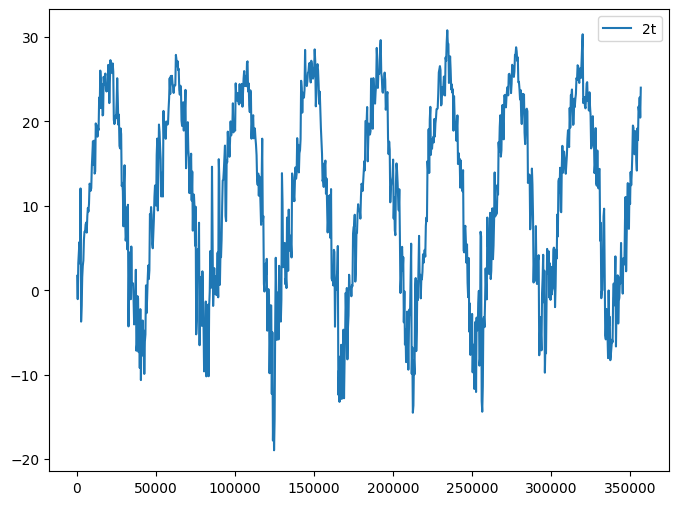

In [ ]:
plot_cols = df_seoul_temperature.columns

plot_features = df_seoul_temperature[plot_cols][:1000]
plot_features.index = df_seoul_temperature.index[:1000]
_ = plot_features.plot(subplots=True)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(df_seoul_temperature)
# result.plot()

In [ ]:
def split_data(data):
    """
    Function to split time series data into train, val and test set.
    Respectively : 70% / 20% / 10%
    """
    n=len(data)
    train_df = data[0:int(n*0.7)]
    val_df = data[int(n*0.7):int(n*0.9)]
    test_df = data[int(n*0.9):]

    return train_df, val_df, test_df, num_features

In [ ]:
def scale(train_df, val_df, test_df):
    """
    Function to scale the entire dataset in place using the mean and standard deviation of the training data only.
    """
    # mean and std computed only on training set
    train_mean = train_df.mean()
    train_std = train_df.std()

    train_df = (train_df - train_mean) / train_std
    val_df = (val_df - train_mean) / train_std
    test_df = (test_df - train_mean) / train_std

    return train_df, val_df, test_df

In [ ]:
def inv_scale(train_df, scaled_df):
    """
    Function to inverse scaling of data in place by using the mean and standard deviation of the training data only.
    """
    # mean and std computed only on training set
    train_mean = train_df.mean()
    train_std = train_df.std()

    unscaled_df = (scaled_df + train_mean) * train_std

    return unscaled_df

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df, val_df, test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    # Meant to be used for extracting input samples from window
    self.input_slice = slice(0, input_width)
    # np.arange(5), creates an array from 0 to 4 (start=0, stop=5, step=1)
    # Generate input indices of a given window
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    # Meant to be used for extracting target samples from window
    self.labels_slice = slice(self.label_start, None)
    # Generate output indices of a given window
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
def plot(self, model=None, plot_col='2t', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 12))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [ ]:
def split_window(self, features):
  # Input of a given window
  inputs = features[:, self.input_slice, :]
  # Target of a given window
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  print(data.shape)
  # This function takes in a sequence of data-points gathered at equal intervals,
  # along with time series parameters such as length of the sequences/windows,
  # spacing between two sequence/windows, etc., to produce batches of timeseries
  # inputs and targets.
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      # Period between successive output sequences
      sequence_stride=1,
      # Period between successive individual timesteps
      sampling_rate=1,
      # Whether to shuffle output samples, or instead draw them in chronological order
      shuffle=True,
      batch_size=12,
      seed=42,
      start_index=None,
      end_index=None)


  # From each window generated a tuple with inputs and outputs
  ds = ds.map(self.split_window)

  element=ds.take(1)
  print(element)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
# The @property decorator allows you to define a method that can be accessed
# like an attribute, but it will be computed dynamically when it is accessed

@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

#
@property
def example(self):
  """
  Get and cache an example batch of `inputs, labels` for plotting.
  The method uses a caching mechanism to avoid recomputing the example
  batch every time it is accessed
  """
  # Check if self._example exist
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.test` dataset
    result = next(iter(self.test))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
df_to_analyse = df_seoul_temperature
# df_to_analyse = df_seoul

num_features = df_to_analyse.shape[-1]

train_df, val_df, test_df, num_features = split_data(df_to_analyse)
print(f"Train size: {train_df.shape}")
print(f"Val size: {val_df.shape}")
print(f"Test size: {test_df.shape}")
print(f"Number of features: {num_features}")

scaled_train_df, scaled_val_df, scaled_test_df = scale(train_df, val_df, test_df)

Train size: (1409, 1)
Val size: (402, 1)
Test size: (202, 1)
Number of features: 1


(202, 1)
<_TakeDataset element_spec=(TensorSpec(shape=(None, 150, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 50, 1), dtype=tf.float32, name=None))>


Total window size: 200
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]
Label indices: [150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199]
Label column name(s): ['2t']

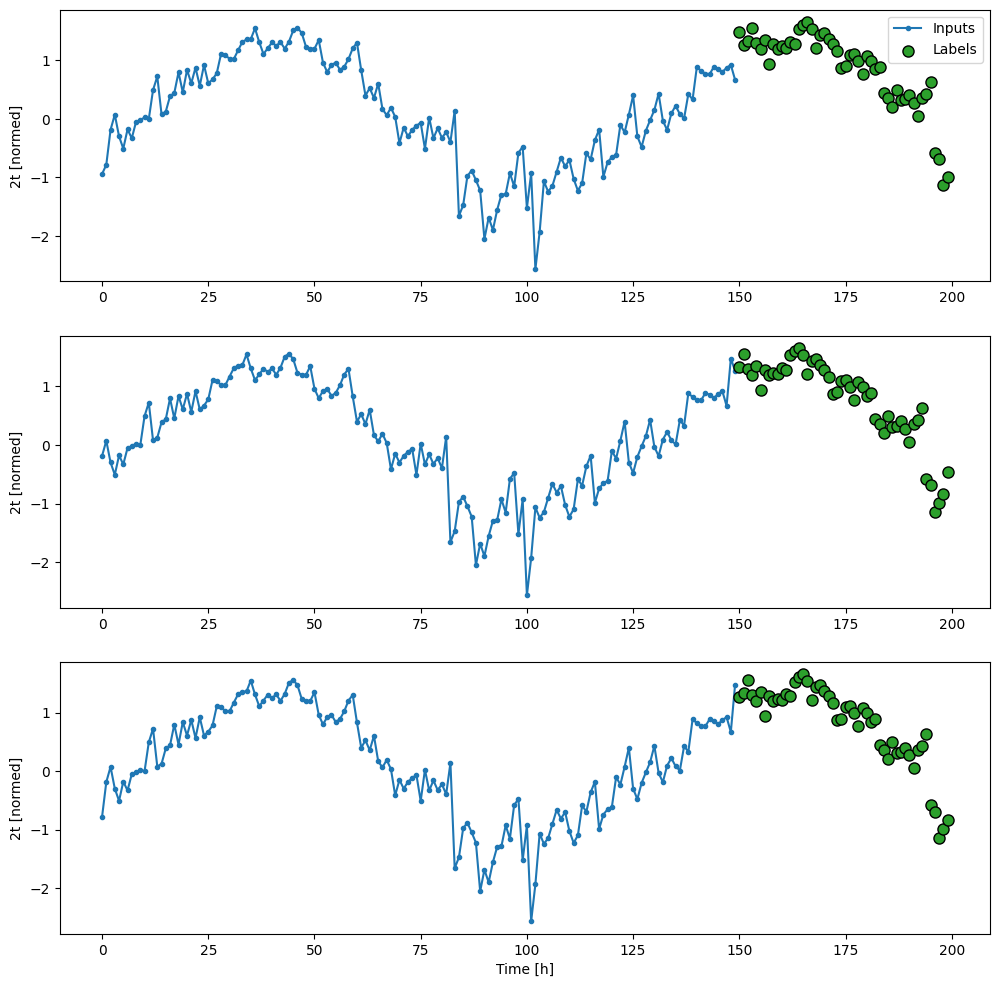

In [ ]:
# We have two samples per day one at 00h and one at 12h, and 5 days per month
# The model will then predict (10/2) 5 days, equivalent to a prediction over 1 months
# in the futur given (120/2) 60 days as input, equivalent to a observation over 1 year

OUT_STEPS = 50
multi_window = WindowGenerator(input_width=150,
                               label_width=OUT_STEPS,
                               train_df = scaled_train_df, val_df = scaled_val_df, test_df = scaled_test_df,
                               shift=OUT_STEPS,
                               label_columns=['2t'])

multi_window.plot()
multi_window

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units] if return_sequences=False
    # Shape [batch, time, features] => [batch, time, lstm_units] if return_sequences=True
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.BatchNormalization(),

    # Shape => [batch, out_steps*features_to_predict].
    tf.keras.layers.Dense(OUT_STEPS*len(multi_window.label_columns),
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features_to_predict].
    tf.keras.layers.Reshape([OUT_STEPS, len(multi_window.label_columns)])
])

multi_lstm_model.build(input_shape=(None, multi_window.input_width, num_features))
multi_lstm_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 150, 32)           4352      
                                                                 
 batch_normalization_44 (Ba  (None, 150, 32)           128       
 tchNormalization)                                               
                                                                 
 lstm_45 (LSTM)              (None, 64)                24832     
                                                                 
 batch_normalization_45 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_17 (Dense)            (None, 50)                3250      
                                                                 
 reshape_17 (Reshape)        (None, 50, 1)           

In [ ]:
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [ ]:
history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance = multi_lstm_model.evaluate(multi_window.val)

(402, 1)
<_TakeDataset element_spec=(TensorSpec(shape=(None, 150, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 50, 1), dtype=tf.float32, name=None))>
17/17 [==============================] - 1s 31ms/step - loss: 0.1259 - mean_absolute_error: 0.2754


(202, 1)
<_TakeDataset element_spec=(TensorSpec(shape=(None, 150, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 50, 1), dtype=tf.float32, name=None))>


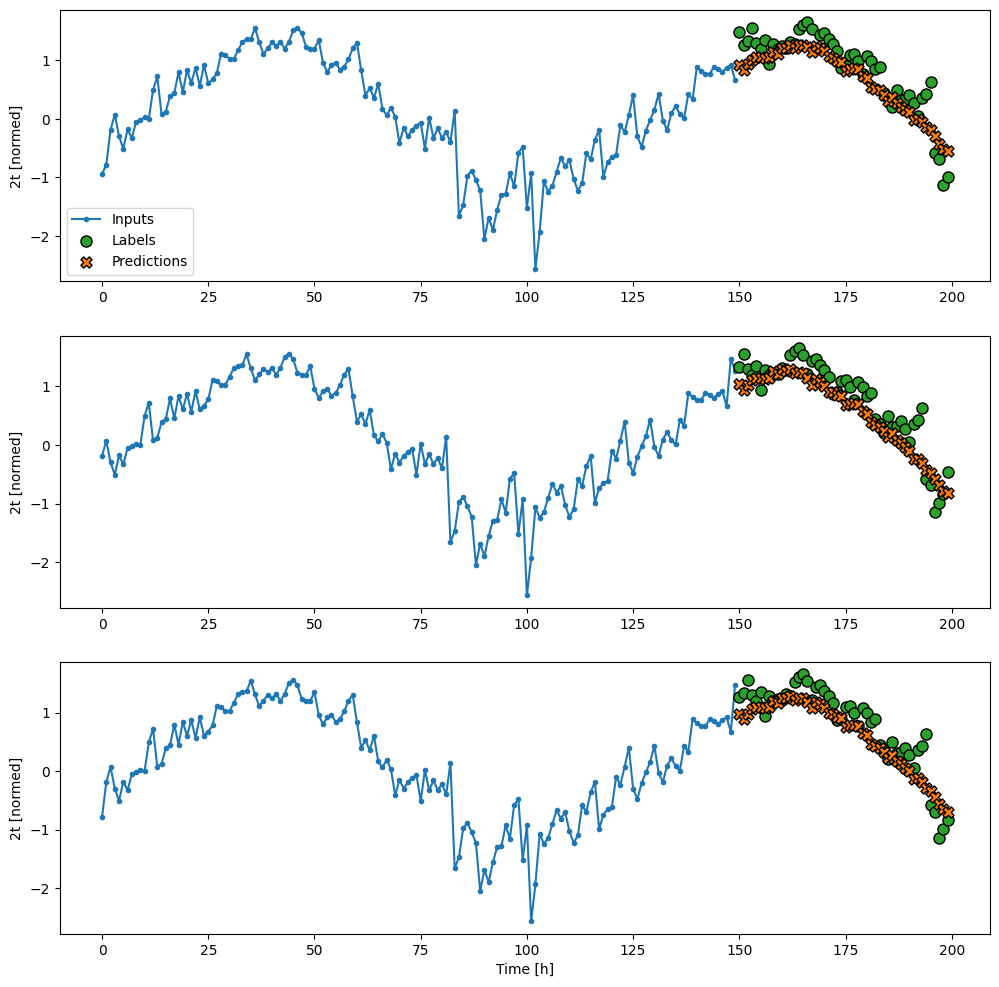

In [ ]:
multi_performance = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

In [ ]:
# https://www.tensorflow.org/tutorials/structured_data/time_series?hl=fr#rnn_2